## Mutual information

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import mutual_info_classif, mutual_info_regression
from sklearn.feature_selection import SelectKBest, SelectPercentile

## Read Data

In [2]:
data = pd.read_csv('../DoHBrwTest.csv')
data.shape

(53860, 35)

In [14]:
data.columns

Index(['SourceIP', 'DestinationIP', 'SourcePort', 'DestinationPort',
       'TimeStamp', 'Duration', 'FlowBytesSent', 'FlowSentRate',
       'FlowBytesReceived', 'FlowReceivedRate', 'PacketLengthVariance',
       'PacketLengthStandardDeviation', 'PacketLengthMean',
       'PacketLengthMedian', 'PacketLengthMode', 'PacketLengthSkewFromMedian',
       'PacketLengthSkewFromMode', 'PacketLengthCoefficientofVariation',
       'PacketTimeVariance', 'PacketTimeStandardDeviation', 'PacketTimeMean',
       'PacketTimeMedian', 'PacketTimeMode', 'PacketTimeSkewFromMedian',
       'PacketTimeSkewFromMode', 'PacketTimeCoefficientofVariation',
       'ResponseTimeTimeVariance', 'ResponseTimeTimeStandardDeviation',
       'ResponseTimeTimeMean', 'ResponseTimeTimeMedian',
       'ResponseTimeTimeMode', 'ResponseTimeTimeSkewFromMedian',
       'ResponseTimeTimeSkewFromMode',
       'ResponseTimeTimeCoefficientofVariation', 'is_intrusion'],
      dtype='object')

In [3]:
data.head()

,SourceIP,DestinationIP,SourcePort,DestinationPort,TimeStamp,Duration,FlowBytesSent,FlowSentRate,FlowBytesReceived,FlowReceivedRate,...,PacketTimeCoefficientofVariation,ResponseTimeTimeVariance,ResponseTimeTimeStandardDeviation,ResponseTimeTimeMean,ResponseTimeTimeMedian,ResponseTimeTimeMode,ResponseTimeTimeSkewFromMedian,ResponseTimeTimeSkewFromMode,ResponseTimeTimeCoefficientofVariation,is_intrusion
0,7.0,2.0,52742,443,18355.0,0.046455,55,1183.941449,66,1420.729738,...,1.000000,0.000000,0.000000,0.046455,0.046455,0.046455,-10.000000,-10.000000,0.000000,0
1,7.0,2.0,54640,443,18365.0,96.750105,42044,434.562836,44920,464.288902,...,0.561877,0.001700,0.041234,0.033549,0.026931,0.026952,0.481463,0.159978,1.229096,0
2,7.0,2.0,56611,443,18373.0,96.365606,41539,431.056284,44577,462.582054,...,0.549156,0.000956,0.030926,0.026551,0.026848,0.026879,-0.028834,-0.010614,1.164778,0
3,7.0,2.0,56611,443,18374.0,121.356820,60659,499.840058,67897,559.482360,...,0.556570,0.001013,0.031829,0.027571,0.026862,0.026941,0.066819,0.019791,1.154439,0
4,7.0,2.0,56611,443,18375.0,104.669253,30409,290.524668,30718,293.476825,...,0.331633,0.001226,0.035013,0.029797,0.026867,0.026908,0.251063,0.082517,1.175049,0


### Train - Test Split

In [4]:
# separate train and test sets

X_train, X_test, y_train, y_test = train_test_split(
    data.drop(labels=['is_intrusion'], axis=1),
    data['is_intrusion'],
    test_size=0.3,
    random_state=0)

X_train.shape, X_test.shape

((37702, 34), (16158, 34))

### Determine Mutual Information

In [5]:
mi = mutual_info_classif(X_test, y_test) 
mi

array([0.24716779, 0.2148959 , 0.02709822, 0.0141347 , 0.26143502,
       0.14098604, 0.16662966, 0.11713808, 0.17609352, 0.11086069,
       0.14911735, 0.14886492, 0.14687006, 0.24740469, 0.26366247,
       0.12377279, 0.12932489, 0.14855203, 0.13229625, 0.13227959,
       0.12805964, 0.1072149 , 0.00984504, 0.11771816, 0.10904195,
       0.11134806, 0.07386004, 0.08007696, 0.07361347, 0.06682055,
       0.06276931, 0.0667976 , 0.06928082, 0.06587165])

Text(0, 0.5, 'Mutual Information')

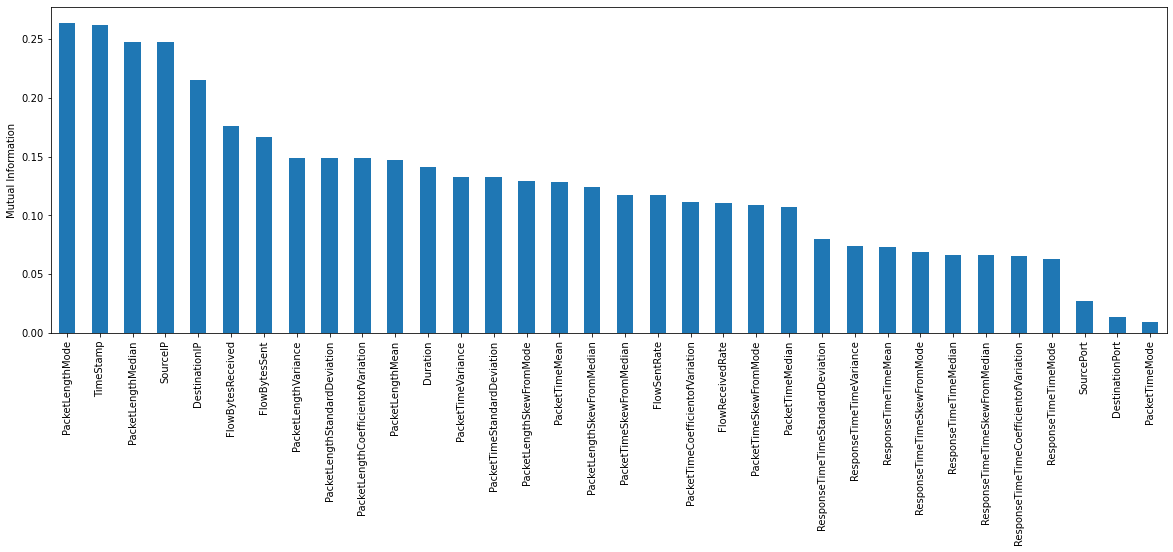

In [6]:
# 1. Let's capture the above array in a pandas series
# 2. Add the variable names in the index
# 3. Sort the features based on their mutual information value
# 4. And make a var plot

mi = pd.Series(mi)
mi.index = X_test.columns
mi.sort_values(ascending=False).plot.bar(figsize=(20, 6))
plt.ylabel('Mutual Information')

### Select top k features based on MI

In [7]:
# select the top 15 features based on their mutual information value
sel_ = SelectKBest(mutual_info_classif, k=15).fit(X_test, y_test)

# display features
X_test.columns[sel_.get_support()]

Index(['SourceIP', 'DestinationIP', 'TimeStamp', 'Duration', 'FlowBytesSent',
       'FlowBytesReceived', 'PacketLengthVariance',
       'PacketLengthStandardDeviation', 'PacketLengthMean',
       'PacketLengthMedian', 'PacketLengthMode', 'PacketLengthSkewFromMode',
       'PacketLengthCoefficientofVariation', 'PacketTimeVariance',
       'PacketTimeStandardDeviation'],
      dtype='object')

In [ ]:
'SourcePort', 'DestinationPort',
'FlowSentRate',
'FlowReceivedRate', 
'PacketLengthSkewFromMedian',
'PacketTimeMean',
'PacketTimeMedian', 'PacketTimeMode', 'PacketTimeSkewFromMedian',
'PacketTimeSkewFromMode', 'PacketTimeCoefficientofVariation',
'ResponseTimeTimeVariance', 'ResponseTimeTimeStandardDeviation',
'ResponseTimeTimeMean', 'ResponseTimeTimeMedian',
'ResponseTimeTimeMode', 'ResponseTimeTimeSkewFromMedian',
'ResponseTimeTimeSkewFromMode',
'ResponseTimeTimeCoefficientofVariation'

In [8]:
# to remove the rest of the features:

X_train = sel_.transform(X_train)
X_test = sel_.transform(X_test)

In [9]:
X_train.shape, X_test.shape

((37702, 15), (16158, 15))

In [13]:
X_test

array([[1.70000000e+01, 8.00000000e+00, 6.88330000e+04, ...,
        5.83114499e-01, 8.49288552e+02, 2.91425557e+01],
       [6.00000000e+00, 0.00000000e+00, 1.41485000e+05, ...,
        1.24995253e+00, 3.99741929e+02, 1.99935472e+01],
       [1.00000000e+00, 6.00000000e+00, 3.87660000e+04, ...,
        0.00000000e+00, 5.84367347e+02, 2.41736912e+01],
       ...,
       [7.00000000e+00, 0.00000000e+00, 1.79230000e+04, ...,
        9.09090909e-02, 5.75777440e-05, 7.58800000e-03],
       [6.00000000e+00, 0.00000000e+00, 5.31980000e+04, ...,
        1.36495298e+00, 3.88279021e+02, 1.97047969e+01],
       [9.00000000e+00, 1.90000000e+01, 9.76170000e+04, ...,
        8.58871787e-01, 2.56506941e+01, 5.06465143e+00]])

## Standardize Data


In [10]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)

## Classifiers

In [11]:
from sklearn import linear_model
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from catboost import CatBoostClassifier

## Metrics Evaluation

In [12]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, f1_score
from sklearn import metrics
from sklearn.model_selection import cross_val_score

### Logistic Regression

In [13]:
%%time
clf_LR = linear_model.LogisticRegression(n_jobs=-1, random_state=42, C=0.1).fit(X_train, y_train)

CPU times: user 69.5 ms, sys: 171 ms, total: 240 ms
Wall time: 2.14 s


In [14]:
pred_y_test = clf_LR.predict(X_test)
print('Accuracy:', accuracy_score(y_test, pred_y_test))

f1 = f1_score(y_test, pred_y_test)
print('F1 Score:', f1)

fpr, tpr, thresholds = roc_curve(y_test, pred_y_test)
print('FPR:', fpr[1])
print('TPR:', tpr[1])

Accuracy: 0.7566977574915658
F1 Score: 0.7444129419613077
FPR: 0.24870312731584407
TPR: 0.7629262456200325


### Naive Bayes

In [15]:
%%time
clf_NB = GaussianNB(var_smoothing=1e-09).fit(X_train, y_train)

CPU times: user 29.5 ms, sys: 7.23 ms, total: 36.7 ms
Wall time: 34.8 ms


In [16]:
pred_y_testNB = clf_NB.predict(X_test)
print('Accuracy:', accuracy_score(y_test, pred_y_testNB))

f1 = f1_score(y_test, pred_y_testNB)
print('F1 Score:', f1)

fpr, tpr, thresholds = roc_curve(y_test, pred_y_testNB)
print('FPR:', fpr[1])
print('TPR:', tpr[1])

Accuracy: 0.45322484619964276
F1 Score: 0.6101867572156197
FPR: 0.9527938342967245
TPR: 0.9214597042987779


### Random Forest


In [17]:
%%time
clf_RF = RandomForestClassifier(random_state=0,max_depth=70,n_estimators=100).fit(X_train, y_train)

CPU times: user 4.15 s, sys: 54.6 ms, total: 4.2 s
Wall time: 4.2 s


In [18]:
pred_y_testRF = clf_RF.predict(X_test)
print('Accuracy:', accuracy_score(y_test, pred_y_testRF))

f1 = f1_score(y_test, pred_y_testRF, average='weighted', zero_division=0)
print('F1 Score:', f1)

fpr, tpr, thresholds = roc_curve(y_test, pred_y_testRF)
print('FPR:', fpr[1])
print('TPR:', tpr[1])

Accuracy: 0.5355824568366739
F1 Score: 0.3736022989766641
FPR: 1.0
TPR: 1.0


### KNN

In [19]:
%%time
clf_KNN = KNeighborsClassifier(algorithm='brute',leaf_size=1,n_neighbors=2,weights='distance').fit(X_train, y_train)

CPU times: user 7.36 ms, sys: 1.47 ms, total: 8.83 ms
Wall time: 7.05 ms


In [20]:
pred_y_testKNN = clf_KNN.predict(X_test)
print('accuracy_score:', accuracy_score(y_test, pred_y_testKNN))

f1 = f1_score(y_test, pred_y_testKNN)
print('f1:', f1)

fpr, tpr, thresholds = roc_curve(y_test, pred_y_testKNN)
print('fpr:', fpr[1])
print('tpr:', tpr[1])

accuracy_score: 0.31049811470529864
f1: 0.4444870810949092
fpr: 0.9353045798132503
tpr: 0.5939663276643022


### CatBoost

In [21]:
%%time
clf_CB = CatBoostClassifier(random_state=0,depth=7,iterations=50,learning_rate=0.04).fit(X_train, y_train)

0:	learn: 0.6566522	total: 61.6ms	remaining: 3.02s
1:	learn: 0.6228628	total: 70.1ms	remaining: 1.68s
2:	learn: 0.5922300	total: 78ms	remaining: 1.22s
3:	learn: 0.5631556	total: 88.2ms	remaining: 1.01s
4:	learn: 0.5361865	total: 96.1ms	remaining: 865ms
5:	learn: 0.5110438	total: 104ms	remaining: 766ms
6:	learn: 0.4884135	total: 113ms	remaining: 697ms
7:	learn: 0.4666639	total: 121ms	remaining: 638ms
8:	learn: 0.4457293	total: 130ms	remaining: 592ms
9:	learn: 0.4257964	total: 140ms	remaining: 559ms
10:	learn: 0.4082545	total: 148ms	remaining: 525ms
11:	learn: 0.3908261	total: 156ms	remaining: 494ms
12:	learn: 0.3742472	total: 165ms	remaining: 468ms
13:	learn: 0.3589114	total: 173ms	remaining: 445ms
14:	learn: 0.3448578	total: 181ms	remaining: 423ms
15:	learn: 0.3309557	total: 189ms	remaining: 402ms
16:	learn: 0.3177523	total: 197ms	remaining: 383ms
17:	learn: 0.3048183	total: 205ms	remaining: 364ms
18:	learn: 0.2932304	total: 213ms	remaining: 347ms
19:	learn: 0.2819444	total: 220ms	rema

In [22]:
pred_y_testCB = clf_CB.predict(X_test)
print('Accuracy:', accuracy_score(y_test, pred_y_testCB))

f1 = f1_score(y_test, pred_y_testCB, average='weighted', zero_division=0)
print('F1 Score:', f1)

fpr, tpr, thresholds = roc_curve(y_test, pred_y_testCB)
print('FPR:', fpr[1])
print('TPR:', tpr[1])

Accuracy: 0.5355824568366739
F1 Score: 0.3736022989766641
FPR: 1.0
TPR: 1.0


## Model Evaluation


In [26]:
import pandas as pd, numpy as np
test_df = pd.read_csv("../KDDTest.csv")
test_df.shape

(22543, 42)

In [28]:
# Create feature matrix X and target vextor y
y_eval = test_df['is_intrusion']
X_eval = test_df.drop(columns=['is_intrusion'])

In [29]:
X_eval = sel_.transform(X_eval)

In [30]:
X_eval.shape

(22543, 15)

### Model Evaluation - Logistic Regression



In [31]:
modelLR = linear_model.LogisticRegression(n_jobs=-1, random_state=42, C=0.1)
modelLR.fit(X_train, y_train)

LogisticRegression(C=0.1, n_jobs=-1, random_state=42)

In [32]:
# Predict on the new unseen test data
y_evalpredLR = modelLR.predict(X_eval)
y_predLR = modelLR.predict(X_test)

In [33]:
train_scoreLR = modelLR.score(X_train, y_train)
test_scoreLR = modelLR.score(X_test, y_test)
print("Training accuracy is ", train_scoreLR)
print("Testing accuracy is ", test_scoreLR)

Training accuracy is  0.9154668227869455
Testing accuracy is  0.7566977574915658


In [34]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
print('Performance measures for test:')
print('--------')
print('Accuracy:', test_scoreLR)
print('F1 Score:',f1_score(y_test, y_predLR))
print('Precision Score:',precision_score(y_test, y_predLR))
print('Recall Score:', recall_score(y_test, y_predLR))
print('Confusion Matrix:\n', confusion_matrix(y_test, y_predLR))

Performance measures for test:
--------
Accuracy: 0.7566977574915658
F1 Score: 0.7444129419613077
Precision Score: 0.7267768460473826
Recall Score: 0.7629262456200325
Confusion Matrix:
 [[10138  3356]
 [ 2774  8927]]


### Cross validation - Logistic Regression




In [35]:
from sklearn.model_selection import cross_val_score
from sklearn import metrics

accuracy = cross_val_score(modelLR, X_eval, y_eval, cv=10, scoring='accuracy')
print("Accuracy: %0.5f (+/- %0.5f)" % (accuracy.mean(), accuracy.std() * 2))

f = cross_val_score(modelLR, X_eval, y_eval, cv=10, scoring='f1')
print("F1 Score: %0.5f (+/- %0.5f)" % (f.mean(), f.std() * 2))

precision = cross_val_score(modelLR, X_eval, y_eval, cv=10, scoring='precision')
print("Precision: %0.5f (+/- %0.5f)" % (precision.mean(), precision.std() * 2))

recall = cross_val_score(modelLR, X_eval, y_eval, cv=10, scoring='recall')
print("Recall: %0.5f (+/- %0.5f)" % (recall.mean(), recall.std() * 2))

Accuracy: 0.81103 (+/- 0.01041)
F1 Score: 0.82782 (+/- 0.01040)
Precision: 0.85983 (+/- 0.01039)
Recall: 0.79816 (+/- 0.01659)


### Model Evaluation - Naive Bayes





In [36]:
modelNB = GaussianNB(var_smoothing=1e-09)
modelNB.fit(X_train, y_train)

GaussianNB()

In [37]:
# Predict on the new unseen test data
y_evalpredNB = modelNB.predict(X_eval)
y_predNB = modelNB.predict(X_test)

In [38]:
train_scoreNB = modelNB.score(X_train, y_train)
test_scoreNB = modelNB.score(X_test, y_test)
print("Training accuracy is ", train_scoreNB)
print("Testing accuracy is ", test_scoreNB)

Training accuracy is  0.8911259513579487
Testing accuracy is  0.45322484619964276


In [39]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
print('Performance measures for test:')
print('--------')
print('Accuracy:', test_scoreNB)
print('F1 Score:',f1_score(y_test, y_predNB))
print('Precision Score:',precision_score(y_test, y_predNB))
print('Recall Score:', recall_score(y_test, y_predNB))
print('Confusion Matrix:\n', confusion_matrix(y_test, y_predNB))

Performance measures for test:
--------
Accuracy: 0.45322484619964276
F1 Score: 0.6101867572156197
Precision Score: 0.45611066457971994
Recall Score: 0.9214597042987779
Confusion Matrix:
 [[  637 12857]
 [  919 10782]]


### Cross validation - Naive Bayes



In [40]:
from sklearn.model_selection import cross_val_score
from sklearn import metrics

accuracy = cross_val_score(modelNB, X_eval, y_eval, cv=10, scoring='accuracy')
print("Accuracy: %0.5f (+/- %0.5f)" % (accuracy.mean(), accuracy.std() * 2))

f = cross_val_score(modelNB, X_eval, y_eval, cv=10, scoring='f1')
print("F1 Score: %0.5f (+/- %0.5f)" % (f.mean(), f.std() * 2))

precision = cross_val_score(modelNB, X_eval, y_eval, cv=10, scoring='precision')
print("Precision: %0.5f (+/- %0.5f)" % (precision.mean(), precision.std() * 2))

recall = cross_val_score(modelNB, X_eval, y_eval, cv=10, scoring='recall')
print("Recall: %0.5f (+/- %0.5f)" % (recall.mean(), recall.std() * 2))

Accuracy: 0.77097 (+/- 0.02316)
F1 Score: 0.78407 (+/- 0.02715)
Precision: 0.84570 (+/- 0.02163)
Recall: 0.73130 (+/- 0.04874)


### Model Evaluation - Random Forest



In [41]:
modelRF = RandomForestClassifier(random_state=0,max_depth=70,n_estimators=100)
modelRF.fit(X_train, y_train)

RandomForestClassifier(max_depth=70, random_state=0)

In [42]:
# Predict on the new unseen test data
y_evalpredRF = modelRF.predict(X_eval)
y_predRF = modelRF.predict(X_test)

In [43]:
train_scoreRF = modelRF.score(X_train, y_train)
test_scoreRF = modelRF.score(X_test, y_test)
print("Training accuracy is ", train_scoreRF)
print("Testing accuracy is ", test_scoreRF)

Training accuracy is  0.9999603084037032
Testing accuracy is  0.5355824568366739


In [44]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
print('Performance measures for test:')
print('--------')
print('Accuracy:', test_scoreRF)
print('F1 Score:', f1_score(y_test, y_predRF, average='weighted', zero_division=0))
print('Precision Score:', precision_score(y_test, y_predRF, average='weighted', zero_division=0))
print('Recall Score:', recall_score(y_test, y_predRF, average='weighted', zero_division=0))
print('Confusion Matrix:\n', confusion_matrix(y_test, y_predRF))

Performance measures for test:
--------
Accuracy: 0.5355824568366739
F1 Score: 0.3736022989766641
Precision Score: 0.28684856807120773
Recall Score: 0.5355824568366739
Confusion Matrix:
 [[13494     0]
 [11701     0]]


### Cross validation - Random Forest



In [45]:
from sklearn.model_selection import cross_val_score
from sklearn import metrics

accuracy = cross_val_score(modelRF, X_eval, y_eval, cv=10, scoring='accuracy')
print("Accuracy: %0.5f (+/- %0.5f)" % (accuracy.mean(), accuracy.std() * 2))

f = cross_val_score(modelRF, X_eval, y_eval, cv=10, scoring='f1')
print("F1 Score: %0.5f (+/- %0.5f)" % (f.mean(), f.std() * 2))

precision = cross_val_score(modelRF, X_eval, y_eval, cv=10, scoring='precision')
print("Precision: %0.5f (+/- %0.5f)" % (precision.mean(), precision.std() * 2))

recall = cross_val_score(modelRF, X_eval, y_eval, cv=10, scoring='recall')
print("Recall: %0.5f (+/- %0.5f)" % (recall.mean(), recall.std() * 2))

Accuracy: 0.98629 (+/- 0.00523)
F1 Score: 0.98796 (+/- 0.00457)
Precision: 0.98793 (+/- 0.00695)
Recall: 0.98800 (+/- 0.00494)


### Model Evaluation - KNN

In [46]:
modelKNN = KNeighborsClassifier(algorithm='brute',leaf_size=1,n_neighbors=2,weights='distance')
modelKNN.fit(X_train, y_train)

KNeighborsClassifier(algorithm='brute', leaf_size=1, n_neighbors=2,
                     weights='distance')

In [47]:
# Predict on the new unseen test data
y_evalpredKNN = modelKNN.predict(X_eval)
y_predKNN = modelKNN.predict(X_test)

In [48]:
train_scoreKNN = modelKNN.score(X_train, y_train)
test_scoreKNN = modelKNN.score(X_test, y_test)
print("Training accuracy is ", train_scoreKNN)
print("Testing accuracy is ", test_scoreKNN)

Training accuracy is  0.9999603084037032
Testing accuracy is  0.31049811470529864


In [49]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
print('Performance measures for test:')
print('--------')
print('Accuracy:', test_scoreKNN)
print('F1 Score:', f1_score(y_test, y_predKNN))
print('Precision Score:', precision_score(y_test, y_predKNN))
print('Recall Score:', recall_score(y_test, y_predKNN))
print('Confusion Matrix:\n', confusion_matrix(y_test, y_predKNN))

Performance measures for test:
--------
Accuracy: 0.31049811470529864
F1 Score: 0.4444870810949092
Precision Score: 0.35511726534157684
Recall Score: 0.5939663276643022
Confusion Matrix:
 [[  873 12621]
 [ 4751  6950]]


### Cross validation - KNN



In [50]:
from sklearn.model_selection import cross_val_score
from sklearn import metrics

accuracy = cross_val_score(modelKNN, X_eval, y_eval, cv=10, scoring='accuracy')
print("Accuracy: %0.5f (+/- %0.5f)" % (accuracy.mean(), accuracy.std() * 2))

f = cross_val_score(modelKNN, X_eval, y_eval, cv=10, scoring='f1')
print("F1 Score: %0.5f (+/- %0.5f)" % (f.mean(), f.std() * 2))

precision = cross_val_score(modelKNN, X_eval, y_eval, cv=10, scoring='precision')
print("Precision: %0.5f (+/- %0.5f)" % (precision.mean(), precision.std() * 2))

recall = cross_val_score(modelKNN, X_eval, y_eval, cv=10, scoring='recall')
print("Recall: %0.5f (+/- %0.5f)" % (recall.mean(), recall.std() * 2))

Accuracy: 0.97893 (+/- 0.00504)
F1 Score: 0.98148 (+/- 0.00440)
Precision: 0.98237 (+/- 0.00705)
Recall: 0.98060 (+/- 0.00454)


### Model Evaluation - CatBoost

In [51]:
modelCB = CatBoostClassifier(random_state=0,depth=7,iterations=50,learning_rate=0.04)
modelCB.fit(X_train, y_train)

0:	learn: 0.6566522	total: 9.45ms	remaining: 463ms
1:	learn: 0.6228628	total: 18ms	remaining: 432ms
2:	learn: 0.5922300	total: 26.7ms	remaining: 418ms
3:	learn: 0.5631556	total: 35.6ms	remaining: 409ms
4:	learn: 0.5361865	total: 43.5ms	remaining: 392ms
5:	learn: 0.5110438	total: 51.7ms	remaining: 379ms
6:	learn: 0.4884135	total: 59.8ms	remaining: 367ms
7:	learn: 0.4666639	total: 67.3ms	remaining: 353ms
8:	learn: 0.4457293	total: 74.7ms	remaining: 340ms
9:	learn: 0.4257964	total: 82.4ms	remaining: 329ms
10:	learn: 0.4082545	total: 89.3ms	remaining: 317ms
11:	learn: 0.3908261	total: 96.8ms	remaining: 307ms
12:	learn: 0.3742472	total: 105ms	remaining: 298ms
13:	learn: 0.3589114	total: 112ms	remaining: 288ms
14:	learn: 0.3448578	total: 119ms	remaining: 278ms
15:	learn: 0.3309557	total: 126ms	remaining: 269ms
16:	learn: 0.3177523	total: 134ms	remaining: 261ms
17:	learn: 0.3048183	total: 142ms	remaining: 252ms
18:	learn: 0.2932304	total: 149ms	remaining: 244ms
19:	learn: 0.2819444	total: 157

In [52]:
# Predict on the new unseen test data
y_evalpredCB = modelCB.predict(X_eval)
y_predCB = modelCB.predict(X_test)

In [53]:
train_scoreCB = modelCB.score(X_train, y_train)
test_scoreCB = modelCB.score(X_test, y_test)
print("Training accuracy is ", train_scoreCB)
print("Testing accuracy is ", test_scoreCB)

Training accuracy is  0.9903350963017356
Testing accuracy is  0.5355824568366739


In [54]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
print('Performance measures for test:')
print('--------')
print('Accuracy:', test_scoreCB)
print('F1 Score:',f1_score(y_test, y_predCB, average='weighted', zero_division=0))
print('Precision Score:',precision_score(y_test, y_predCB, average='weighted', zero_division=0))
print('Recall Score:', recall_score(y_test, y_predCB, average='weighted', zero_division=0))
print('Confusion Matrix:\n', confusion_matrix(y_test, y_predCB))

Performance measures for test:
--------
Accuracy: 0.5355824568366739
F1 Score: 0.3736022989766641
Precision Score: 0.28684856807120773
Recall Score: 0.5355824568366739
Confusion Matrix:
 [[13494     0]
 [11701     0]]


### Cross validation - CatBoost

In [55]:
from sklearn.model_selection import cross_val_score
from sklearn import metrics

accuracy = cross_val_score(modelCB, X_eval, y_eval, cv=10, scoring='accuracy')
f = cross_val_score(modelCB, X_eval, y_eval, cv=10, scoring='f1')
precision = cross_val_score(modelCB, X_eval, y_eval, cv=10, scoring='precision')
recall = cross_val_score(modelCB, X_eval, y_eval, cv=10, scoring='recall')

0:	learn: 0.6616701	total: 5.7ms	remaining: 279ms
1:	learn: 0.6321891	total: 10.1ms	remaining: 243ms
2:	learn: 0.6046360	total: 14.4ms	remaining: 226ms
3:	learn: 0.5788050	total: 18.5ms	remaining: 213ms
4:	learn: 0.5550633	total: 22.8ms	remaining: 205ms
5:	learn: 0.5330863	total: 27.5ms	remaining: 202ms
6:	learn: 0.5119701	total: 31.8ms	remaining: 195ms
7:	learn: 0.4921430	total: 36.3ms	remaining: 191ms
8:	learn: 0.4737368	total: 40.5ms	remaining: 184ms
9:	learn: 0.4575161	total: 44.4ms	remaining: 178ms
10:	learn: 0.4421399	total: 48.4ms	remaining: 172ms
11:	learn: 0.4267353	total: 52.7ms	remaining: 167ms
12:	learn: 0.4113915	total: 56.8ms	remaining: 162ms
13:	learn: 0.3987602	total: 61ms	remaining: 157ms
14:	learn: 0.3850179	total: 65.2ms	remaining: 152ms
15:	learn: 0.3723524	total: 69.3ms	remaining: 147ms
16:	learn: 0.3609629	total: 73.3ms	remaining: 142ms
17:	learn: 0.3498723	total: 77.6ms	remaining: 138ms
18:	learn: 0.3390139	total: 82ms	remaining: 134ms
19:	learn: 0.3285749	total:

13:	learn: 0.3983152	total: 58.8ms	remaining: 151ms
14:	learn: 0.3847519	total: 62.9ms	remaining: 147ms
15:	learn: 0.3726000	total: 66.8ms	remaining: 142ms
16:	learn: 0.3612803	total: 70.9ms	remaining: 138ms
17:	learn: 0.3502350	total: 75.4ms	remaining: 134ms
18:	learn: 0.3391063	total: 79.5ms	remaining: 130ms
19:	learn: 0.3289724	total: 83.8ms	remaining: 126ms
20:	learn: 0.3189158	total: 87.8ms	remaining: 121ms
21:	learn: 0.3094865	total: 92ms	remaining: 117ms
22:	learn: 0.3005641	total: 96.1ms	remaining: 113ms
23:	learn: 0.2915242	total: 100ms	remaining: 109ms
24:	learn: 0.2831169	total: 105ms	remaining: 105ms
25:	learn: 0.2754890	total: 109ms	remaining: 100ms
26:	learn: 0.2680782	total: 113ms	remaining: 96.1ms
27:	learn: 0.2609080	total: 117ms	remaining: 92ms
28:	learn: 0.2536014	total: 121ms	remaining: 87.7ms
29:	learn: 0.2470567	total: 125ms	remaining: 83.5ms
30:	learn: 0.2412692	total: 129ms	remaining: 79.3ms
31:	learn: 0.2354508	total: 134ms	remaining: 75.2ms
32:	learn: 0.229108

46:	learn: 0.1682979	total: 197ms	remaining: 12.6ms
47:	learn: 0.1647167	total: 201ms	remaining: 8.39ms
48:	learn: 0.1615183	total: 205ms	remaining: 4.19ms
49:	learn: 0.1585351	total: 209ms	remaining: 0us
0:	learn: 0.6614472	total: 4.48ms	remaining: 220ms
1:	learn: 0.6324290	total: 9.2ms	remaining: 221ms
2:	learn: 0.6052141	total: 13.4ms	remaining: 209ms
3:	learn: 0.5798095	total: 17.7ms	remaining: 204ms
4:	learn: 0.5559698	total: 21.8ms	remaining: 196ms
5:	learn: 0.5333345	total: 26.3ms	remaining: 193ms
6:	learn: 0.5121625	total: 30.4ms	remaining: 187ms
7:	learn: 0.4927193	total: 34.7ms	remaining: 182ms
8:	learn: 0.4743810	total: 39ms	remaining: 178ms
9:	learn: 0.4575160	total: 43.2ms	remaining: 173ms
10:	learn: 0.4408359	total: 47.1ms	remaining: 167ms
11:	learn: 0.4248083	total: 51.3ms	remaining: 162ms
12:	learn: 0.4099990	total: 55.6ms	remaining: 158ms
13:	learn: 0.3959838	total: 59.9ms	remaining: 154ms
14:	learn: 0.3822969	total: 64.5ms	remaining: 151ms
15:	learn: 0.3696670	total: 

11:	learn: 0.4267353	total: 49.6ms	remaining: 157ms
12:	learn: 0.4113915	total: 53.7ms	remaining: 153ms
13:	learn: 0.3987602	total: 57.8ms	remaining: 149ms
14:	learn: 0.3850179	total: 61.7ms	remaining: 144ms
15:	learn: 0.3723524	total: 65.5ms	remaining: 139ms
16:	learn: 0.3609629	total: 69.5ms	remaining: 135ms
17:	learn: 0.3498723	total: 73.6ms	remaining: 131ms
18:	learn: 0.3390139	total: 77.8ms	remaining: 127ms
19:	learn: 0.3285749	total: 82ms	remaining: 123ms
20:	learn: 0.3187713	total: 86.3ms	remaining: 119ms
21:	learn: 0.3092190	total: 90.4ms	remaining: 115ms
22:	learn: 0.3001240	total: 94.7ms	remaining: 111ms
23:	learn: 0.2910996	total: 98.8ms	remaining: 107ms
24:	learn: 0.2827656	total: 103ms	remaining: 103ms
25:	learn: 0.2751860	total: 107ms	remaining: 99.1ms
26:	learn: 0.2679736	total: 111ms	remaining: 94.9ms
27:	learn: 0.2608080	total: 116ms	remaining: 90.9ms
28:	learn: 0.2535247	total: 120ms	remaining: 86.9ms
29:	learn: 0.2467131	total: 124ms	remaining: 82.8ms
30:	learn: 0.24

47:	learn: 0.1635045	total: 198ms	remaining: 8.27ms
48:	learn: 0.1603474	total: 202ms	remaining: 4.13ms
49:	learn: 0.1571292	total: 206ms	remaining: 0us
0:	learn: 0.6627487	total: 4.49ms	remaining: 220ms
1:	learn: 0.6331835	total: 8.93ms	remaining: 214ms
2:	learn: 0.6059709	total: 13.5ms	remaining: 212ms
3:	learn: 0.5807476	total: 17.8ms	remaining: 205ms
4:	learn: 0.5569947	total: 22ms	remaining: 198ms
5:	learn: 0.5345462	total: 26ms	remaining: 191ms
6:	learn: 0.5133892	total: 30.9ms	remaining: 190ms
7:	learn: 0.4934829	total: 35.2ms	remaining: 185ms
8:	learn: 0.4750361	total: 39.5ms	remaining: 180ms
9:	learn: 0.4580104	total: 43.6ms	remaining: 174ms
10:	learn: 0.4415383	total: 47.6ms	remaining: 169ms
11:	learn: 0.4258118	total: 51.9ms	remaining: 164ms
12:	learn: 0.4109201	total: 56.3ms	remaining: 160ms
13:	learn: 0.3971747	total: 60.5ms	remaining: 156ms
14:	learn: 0.3836100	total: 64.5ms	remaining: 151ms
15:	learn: 0.3711279	total: 68.6ms	remaining: 146ms
16:	learn: 0.3591308	total: 7

12:	learn: 0.4099990	total: 55.7ms	remaining: 159ms
13:	learn: 0.3959838	total: 59.8ms	remaining: 154ms
14:	learn: 0.3822969	total: 63.9ms	remaining: 149ms
15:	learn: 0.3696670	total: 68ms	remaining: 144ms
16:	learn: 0.3579899	total: 72ms	remaining: 140ms
17:	learn: 0.3469999	total: 76ms	remaining: 135ms
18:	learn: 0.3359585	total: 80ms	remaining: 131ms
19:	learn: 0.3260338	total: 84.6ms	remaining: 127ms
20:	learn: 0.3160567	total: 88.7ms	remaining: 122ms
21:	learn: 0.3066875	total: 92.7ms	remaining: 118ms
22:	learn: 0.2979532	total: 97ms	remaining: 114ms
23:	learn: 0.2890417	total: 101ms	remaining: 110ms
24:	learn: 0.2807347	total: 106ms	remaining: 106ms
25:	learn: 0.2731395	total: 110ms	remaining: 101ms
26:	learn: 0.2660844	total: 114ms	remaining: 96.9ms
27:	learn: 0.2593344	total: 118ms	remaining: 92.5ms
28:	learn: 0.2520663	total: 122ms	remaining: 88.3ms
29:	learn: 0.2453355	total: 126ms	remaining: 84.1ms
30:	learn: 0.2393849	total: 130ms	remaining: 79.9ms
31:	learn: 0.2331788	tota

46:	learn: 0.1672800	total: 199ms	remaining: 12.7ms
47:	learn: 0.1638136	total: 203ms	remaining: 8.45ms
48:	learn: 0.1605954	total: 207ms	remaining: 4.22ms
49:	learn: 0.1579242	total: 211ms	remaining: 0us
0:	learn: 0.6617514	total: 4.33ms	remaining: 212ms
1:	learn: 0.6323087	total: 8.33ms	remaining: 200ms
2:	learn: 0.6051584	total: 13ms	remaining: 203ms
3:	learn: 0.5794753	total: 17.3ms	remaining: 199ms
4:	learn: 0.5556811	total: 21.6ms	remaining: 194ms
5:	learn: 0.5340768	total: 25.5ms	remaining: 187ms
6:	learn: 0.5130756	total: 29.6ms	remaining: 182ms
7:	learn: 0.4932317	total: 33.7ms	remaining: 177ms
8:	learn: 0.4746212	total: 38ms	remaining: 173ms
9:	learn: 0.4580863	total: 42.4ms	remaining: 169ms
10:	learn: 0.4418357	total: 46.7ms	remaining: 165ms
11:	learn: 0.4260229	total: 50.8ms	remaining: 161ms
12:	learn: 0.4111694	total: 55ms	remaining: 157ms
13:	learn: 0.3974308	total: 58.9ms	remaining: 152ms
14:	learn: 0.3838396	total: 62.9ms	remaining: 147ms
15:	learn: 0.3714539	total: 67.

14:	learn: 0.3836100	total: 62.6ms	remaining: 146ms
15:	learn: 0.3711279	total: 66.7ms	remaining: 142ms
16:	learn: 0.3591308	total: 70.6ms	remaining: 137ms
17:	learn: 0.3475557	total: 74.7ms	remaining: 133ms
18:	learn: 0.3366674	total: 78.6ms	remaining: 128ms
19:	learn: 0.3264118	total: 82.7ms	remaining: 124ms
20:	learn: 0.3165164	total: 87.2ms	remaining: 120ms
21:	learn: 0.3069921	total: 91.5ms	remaining: 116ms
22:	learn: 0.2979493	total: 95.6ms	remaining: 112ms
23:	learn: 0.2891221	total: 99.7ms	remaining: 108ms
24:	learn: 0.2808190	total: 104ms	remaining: 104ms
25:	learn: 0.2732322	total: 108ms	remaining: 99.8ms
26:	learn: 0.2661535	total: 112ms	remaining: 95.6ms
27:	learn: 0.2590600	total: 116ms	remaining: 91.4ms
28:	learn: 0.2524639	total: 121ms	remaining: 87.3ms
29:	learn: 0.2458997	total: 125ms	remaining: 83.2ms
30:	learn: 0.2399082	total: 129ms	remaining: 79ms
31:	learn: 0.2342062	total: 133ms	remaining: 75ms
32:	learn: 0.2288901	total: 138ms	remaining: 70.8ms
33:	learn: 0.2235

47:	learn: 0.1630812	total: 200ms	remaining: 8.35ms
48:	learn: 0.1598706	total: 204ms	remaining: 4.17ms
49:	learn: 0.1568782	total: 208ms	remaining: 0us
0:	learn: 0.6627666	total: 3.9ms	remaining: 191ms
1:	learn: 0.6339447	total: 8.16ms	remaining: 196ms
2:	learn: 0.6067791	total: 12.6ms	remaining: 197ms
3:	learn: 0.5813530	total: 16.9ms	remaining: 194ms
4:	learn: 0.5579351	total: 21.1ms	remaining: 190ms
5:	learn: 0.5363739	total: 25.2ms	remaining: 185ms
6:	learn: 0.5148555	total: 29.3ms	remaining: 180ms
7:	learn: 0.4949396	total: 33.5ms	remaining: 176ms
8:	learn: 0.4762836	total: 37.9ms	remaining: 173ms
9:	learn: 0.4599564	total: 42ms	remaining: 168ms
10:	learn: 0.4434878	total: 46.1ms	remaining: 163ms
11:	learn: 0.4275345	total: 50.2ms	remaining: 159ms
12:	learn: 0.4122767	total: 54.4ms	remaining: 155ms
13:	learn: 0.3996062	total: 58.8ms	remaining: 151ms
14:	learn: 0.3863552	total: 62.7ms	remaining: 146ms
15:	learn: 0.3736921	total: 66.8ms	remaining: 142ms
16:	learn: 0.3621086	total: 

13:	learn: 0.3974308	total: 59.3ms	remaining: 152ms
14:	learn: 0.3838396	total: 63.3ms	remaining: 148ms
15:	learn: 0.3714539	total: 67.5ms	remaining: 144ms
16:	learn: 0.3592554	total: 71.4ms	remaining: 139ms
17:	learn: 0.3479826	total: 75.5ms	remaining: 134ms
18:	learn: 0.3371025	total: 79.4ms	remaining: 129ms
19:	learn: 0.3271581	total: 83.6ms	remaining: 125ms
20:	learn: 0.3177553	total: 87.7ms	remaining: 121ms
21:	learn: 0.3084368	total: 92.2ms	remaining: 117ms
22:	learn: 0.2992602	total: 96.3ms	remaining: 113ms
23:	learn: 0.2901377	total: 101ms	remaining: 110ms
24:	learn: 0.2818131	total: 106ms	remaining: 106ms
25:	learn: 0.2742951	total: 110ms	remaining: 101ms
26:	learn: 0.2671613	total: 114ms	remaining: 97.3ms
27:	learn: 0.2596965	total: 118ms	remaining: 93ms
28:	learn: 0.2524976	total: 123ms	remaining: 88.8ms
29:	learn: 0.2458055	total: 127ms	remaining: 84.6ms
30:	learn: 0.2399000	total: 131ms	remaining: 80.3ms
31:	learn: 0.2340000	total: 135ms	remaining: 76ms
32:	learn: 0.227901

47:	learn: 0.1638879	total: 200ms	remaining: 8.33ms
48:	learn: 0.1604723	total: 204ms	remaining: 4.16ms
49:	learn: 0.1575426	total: 208ms	remaining: 0us
0:	learn: 0.6626873	total: 4.3ms	remaining: 211ms
1:	learn: 0.6331966	total: 8.6ms	remaining: 206ms
2:	learn: 0.6059627	total: 12.7ms	remaining: 199ms
3:	learn: 0.5808134	total: 16.9ms	remaining: 195ms
4:	learn: 0.5570914	total: 21.1ms	remaining: 190ms
5:	learn: 0.5355078	total: 25.4ms	remaining: 186ms
6:	learn: 0.5139677	total: 29.5ms	remaining: 181ms
7:	learn: 0.4940229	total: 33.7ms	remaining: 177ms
8:	learn: 0.4760979	total: 37.8ms	remaining: 172ms
9:	learn: 0.4590626	total: 41.8ms	remaining: 167ms
10:	learn: 0.4427507	total: 46.1ms	remaining: 163ms
11:	learn: 0.4270469	total: 50.1ms	remaining: 159ms
12:	learn: 0.4120845	total: 54.3ms	remaining: 155ms
13:	learn: 0.3989247	total: 58.7ms	remaining: 151ms
14:	learn: 0.3851031	total: 62.6ms	remaining: 146ms
15:	learn: 0.3725024	total: 66.5ms	remaining: 141ms
16:	learn: 0.3603036	total:

13:	learn: 0.3996062	total: 58.8ms	remaining: 151ms
14:	learn: 0.3863552	total: 62.8ms	remaining: 146ms
15:	learn: 0.3736921	total: 66.6ms	remaining: 142ms
16:	learn: 0.3621086	total: 70.7ms	remaining: 137ms
17:	learn: 0.3510242	total: 74.8ms	remaining: 133ms
18:	learn: 0.3398932	total: 78.9ms	remaining: 129ms
19:	learn: 0.3300867	total: 83ms	remaining: 125ms
20:	learn: 0.3202762	total: 87.3ms	remaining: 121ms
21:	learn: 0.3109039	total: 91.4ms	remaining: 116ms
22:	learn: 0.3017828	total: 95.6ms	remaining: 112ms
23:	learn: 0.2926497	total: 99.6ms	remaining: 108ms
24:	learn: 0.2843329	total: 104ms	remaining: 104ms
25:	learn: 0.2767456	total: 108ms	remaining: 99.9ms
26:	learn: 0.2694723	total: 113ms	remaining: 96ms
27:	learn: 0.2627206	total: 117ms	remaining: 92ms
28:	learn: 0.2551098	total: 121ms	remaining: 87.9ms
29:	learn: 0.2484513	total: 125ms	remaining: 83.6ms
30:	learn: 0.2423966	total: 130ms	remaining: 79.5ms
31:	learn: 0.2360784	total: 134ms	remaining: 75.4ms
32:	learn: 0.230472

In [56]:
print("Accuracy: %0.5f (+/- %0.5f)" % (accuracy.mean(), accuracy.std() * 2))
print("F1 Score: %0.5f (+/- %0.5f)" % (f.mean(), f.std() * 2))
print("Precision: %0.5f (+/- %0.5f)" % (precision.mean(), precision.std() * 2))
print("Recall: %0.5f (+/- %0.5f)" % (recall.mean(), recall.std() * 2))

Accuracy: 0.96611 (+/- 0.00489)
F1 Score: 0.97069 (+/- 0.00426)
Precision: 0.95590 (+/- 0.00698)
Recall: 0.98597 (+/- 0.00839)
